In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems

x, y, z, e, f = 0..20, 0..20, 0..20, 0..20, 0..20
box = x × y × z × e × f

using CairoMakie, GLMakie

In [5]:
function model_braint_rhythms(u, p, t)

    sE, sI, rE, rI, Y = u
    τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, gammaY, ythr, sEthr, kY = p

    g(Y) = 1 + gammaY / (1 + exp(-Y + ythr))
    HevY(sE) = 1/(1 + exp(-(sE - sEthr)/kY))

    dsEdt = (1/τsE) *(-sE + γE*rE*(1-sE)*g(Y) + s0E)
    dsIdt = (1/τsI) *(-sI + γI*rI*(1-sI) + s0I)

    drEdt = (1/ τrE) *(-rE + 1/(1 + exp(-kE*((IE + wEE*sE-wIE*sI) -  θE))))
    drIdt = (1/τrI) *(-rI + 1/(1 + exp(-kI*((II + wEI*sE-wII*sI) - θI))))
    
    dYdt = -Y / τY + βY * HevY(sE)
    
    return SVector(dsEdt, dsIdt, drEdt, drIdt, dYdt)
    
end    

model_braint_rhythms (generic function with 1 method)

In [6]:
time = 2000; tt = 0.0; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [ ]:
"""Control param
γY
W
I
s0E
s0I"""

In [566]:
"""Бифуркация Андронова-Хопфа. Нету влияния астроцитов

τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.26; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 0.01;  βY = 0.00;  γY = 0.0; 
ythr = 0.5; sEthr = 0.5; kY = 0.01"""

"Бифуркация Андронова-Хопфа. Нету влияния астроцитов\n\nτsE = 3.0; γE = 4.0; s0E = 0.15;\nτsI = 10.0; γI = 8.0; s0I = 0.1;\n\nτrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;\nτrI = 6.0; kI = 5.0; II = 0.26; wEI = 5.0; wII = 3.0; θI = 0.4;\n\nτY = 0.01;  βY = 0.00;  γY = 0.0; \nythr = 0.5; sEthr = 0.5; kY = 0.01"

In [562]:
τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.26; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 0.01;  βY = 0.00;  γY = 0.0; 
ythr = 0.5; sEthr = 0.5; kY = 0.01

p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];

u0 = tr[end] # [0.0, 0.0, 0.0, 0.0, 0.0]

ds = CoupledODEs(model_braint_rhythms, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, time, Δt = tstep)

(5-dimensional StateSpaceSet{Float64} with 2000001 points, 0.0:0.001:2000.0)

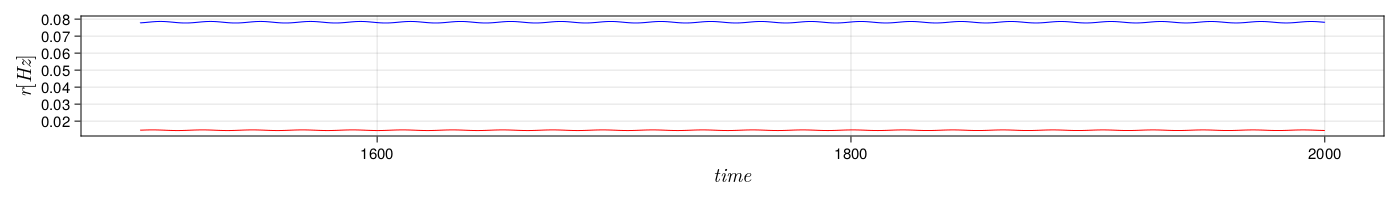

CairoMakie.Screen{IMAGE}


In [563]:
tstart, tend = 1500000, 2000000
tickssize = 15
labelsize = 20

CairoMakie.activate!()
f= Figure(resolution = (1400, 200))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r[Hz]", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = tickssize, yticklabelsize = tickssize)
                #xticklabelsize = tickssize, yticklabelsize = tickssize)

lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 3], linewidth = 1.0, color = :red)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 4], linewidth = 1.0, color = :blue)

display(f)

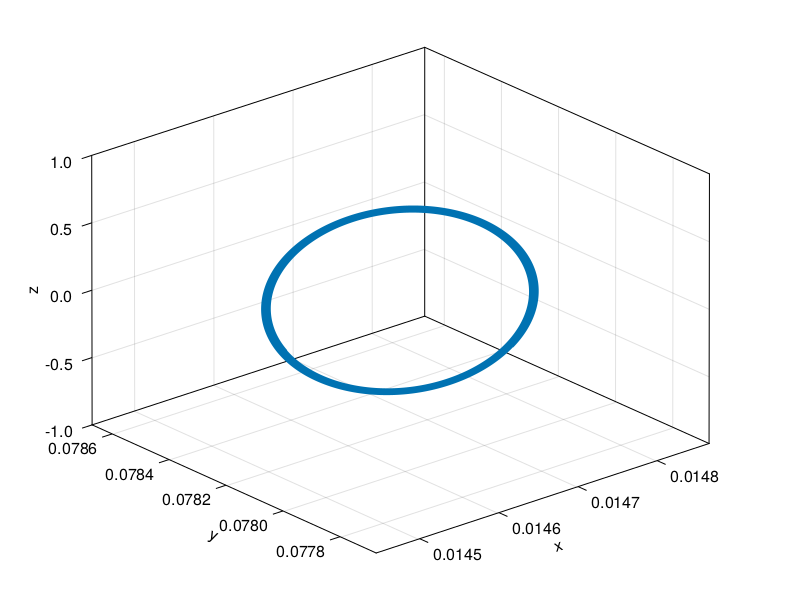

CairoMakie.Screen{IMAGE}


In [564]:
tstart, tend = 1500000, 2000000

f = Figure(resolution = (800, 600))
axis3d = Axis3(f[1, 1])
lines!(tr[tstart:tend, 3], tr[tstart:tend, 4], tr[tstart:tend, 5])

display(f)